### Pandas Accessing Data
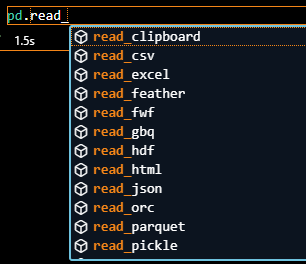


In [3]:
#you can use the pd.to_to insert data

import pandas as pd
#pd.read_csv(sep=,)
#but whats more powerful is loading data from the internet
#search up the API isntruction from that website
#for example. huggingface.com is 
from datasets import load_dataset
#df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

### exploring the dataframe

In [4]:


#remember whenever you assign a data frame to another data frame 
#for the first time, always use .copy()
#df_filled = df.copy()

#sampling data for everyone
#outputing the same results everys single time
df.sample(10, random_state = 42)

NameError: name 'df' is not defined

### Choosing and interacting with data


In [ ]:
### FILTERING DATA

#choosing range of columns is simply naming the columns
#df.col_name or df['col_name']

#choosing range of rows
df.iloc[0:5]
#or with names
#names are important when it comes to pivot tables and index with names
df.loc[:, 'salary_year_avg': 'company_name'].dropna(subset='salary_year_avg')


#CLEANING DATA

#clean data by inputing NA values
#we will fill the na using median
median_avg_year = df.salary_year_avg.median()
median_avg_hour = df.salary_hour_avg.median()

print(median_avg_year)
print(median_avg_hour)

df_filled['salary_year_avg'] = df_filled.salary_year_avg.fillna(median_avg_year)
df_filled['salary_hour_avg'] = df_filled.salary_hour_avg.fillna(median_avg_hour)

df_filled.salary_year_avg.median()
df_filled.salary_hour_avg.median()
# There are other intepolation methods. 
#.interpolation()

#cleaning duplicates
df_unique =  df_filled.drop_duplicates()
df_unique =  df_filled.drop_duplicates(subset = ['job_title', 'company_name']).copy()


### INTERACTING WITH DATA

### working with dates
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#pd.to_datetime(), dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, dt.strftime(format), dt.weekday(), dt.isin(), dt.days_in_month, dt.quarter, dt.is_leap_year, dt.normalize(), dt.floor(freq), dt.ceil(freq), dt.round(freq), dt.total_seconds()
#converting the str name of the month %B to a date-time format
#setting the column to a date time format first, then setting it to new column, then extracting the month only
df_pivot_Luke['month_no']=pd.to_datetime(df_pivot_Luke['job_posted_month_name'], format = '%B').dt.month.copy()


#pd.functions()
#pd.read_csv(), pd.read_excel(), pd.to_numeric(), pd.cut(), pd.qcut(), pd.merge(), pd.concat(), pd.pivot_table(), pd.crosstab(), pd.get_dummies(), pd.isnull(), pd.notnull(), pd.melt(), pd.pivot(), pd.DataFrame.apply(), pd.DataFrame.map(), pd.DataFrame.fillna(), pd.DataFrame.dropna(), pd.DataFrame.replace(), pd.DataFrame.drop_duplicates(), pd.DataFrame.duplicated(), pd.DataFrame.groupby(), pd.DataFrame.sort_values(), pd.DataFrame.describe()

### grouping columns and performing aggregation methods on those groupings
df.groupby('job_title_short').size().sort_values(ascending=False),
#other are size(), count(), sum(), mean(), median(), min(), max(), std(), var(), quantile(q), first(), last(), prod(), nunique(), agg()
#now you have names to interct with .loc

#set categories for data
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'job_posted_month_name' to a categorical type with the correct order
df['job_posted_month_name'] = pd.Categorical(df['job_posted_month_name'], 
                                              categories=month_order, 
                                              ordered=True)
##how to apply aggregation functions
df_total = df_pivot.copy()
#using .aggregation and inserting the row total using .loc['new name']
df_total.loc['Total'] = df_pivot.sum()

#doing this for the column 
df_total['Total'] = df_pivot.sum(axis=1)

df_total

### working with applying your own function on data 
##Use apply() on spefic columns or rows
#we first will apply a function where the salary_year_avg will be predicted to be 3% higher . 
#here, will show both the apply using new equations or a lambda function

#first we will have to get rid of na
df_salary = df_US[pd.notna(df['salary_year_avg'])].copy()

#method 1: since this one is simple, this is a simplier option 
df_salary['predicted_salary']= df_salary.salary_hour_avg * 1.03

#method 2: using an independent function
def equation(salary):
    return salary * 1.03

df_salary['predicted_salary']= df_salary.salary_year_avg.apply(equation)

#method 3: using a lambda function
df_salary['predicted_salary']= df_salary.salary_year_avg.apply(lambda salary: salary * 1.03)


##exploding similar to unpivoting a columns
help(df.explode)




###Performing the pivot table

In [ ]:
#the most simplest is constructing with 1 index, what do you want your values to be from
df.pivot_table(index = 'job_title_short', aggfunc = 'size').sort_values(ascending=False)


#ways to section off a pivot table
#1. using .loc slicing with both rows and column
# top_country  =  df.job_country.value_counts()[0:6].index
#df_job_country = df_job_country.loc[top_country, 'Data Analyst':'Data Scientist']


### Interacting with files

In [ ]:
#using merge, concat
merged_df = df_US_software.merge(df_pivot, on='job_posted_month')

### how to plot

In [ ]:
###USEFUL CUSTOMIZATION

#one plot 
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation= 45, ha = 'right')

###Exporting

In [ ]:
.to_clipboard()
.to_csv()

#requires additional steps
.to_excel()
.to_sql()

#quick out and back in 
.to_pickle()
.to_perquet()